# **Proyecto aplicado por:**
---

*   Cristhian David Mora Uribe cdmorau@unal.edu.co
*   Martin Camilo Rodriguez Murcia mrodriguezmu@unal.edu.co
*   Nestor Steven Negrete Pinilla narutones98@gmail.com

## **1. Marco de Proyecto**
---

### **1.1. Trasfondo del Negocio**



1. Los principales beneficiarios de este proyecto son los inversores en criptomonedas, analistas financieros y científicos de datos interesados en el mercado de criptomonedas.
Este proyecto se sitúa principalmente en el dominio de las finanzas y la tecnología, específicamente en el ámbito de las criptomonedas y blockchain.

2. Los problemas que se buscan abordar incluyen:
*   Falta de transparencia en los precios y volúmenes de transacciones.
*   Dificultades para predecir precios futuros debido a la volatilidad del mercado.
*   Necesidad de análisis histórico para comprender tendencias y patrones.
*   Identificación de factores que afectan los precios de las criptomonedas.





### **1.2. Alcance**

1. Se propone implementar un modelo de predicción de precios utilizando técnicas de Deep Learning, como redes neuronales recurrentes (RNN), que son efectivos para series temporales. Este modelo puede ayudar a prever movimientos futuros en los precios de las criptomonedas basándose en datos históricos y otros parámetros relevantes.
2. Acciones a Realizar
*   **Recolección y limpieza de datos** Organizar los datos históricos y actuales sobre precios, volúmenes y capitalización de mercado.
*   **Análisis exploratorio** Identificar patrones y correlaciones entre diferentes criptomonedas.
*   **Desarrollo del modelo** Entrenar un modelo de Deep Learning con los datos recopilados para hacer predicciones sobre futuros movimientos de precios.
*   **Validación y ajuste del modelo** Probar el modelo con datos no vistos y ajustar parámetros para mejorar la precisión.
3. Los clientes podrán utilizar la solución desarrollada para:
*   Tomar decisiones informadas sobre inversiones en criptomonedas.
*   Comprender mejor la dinámica del mercado y los factores que influyen en los precios.
*   Realizar análisis comparativos entre diferentes criptomonedas para identificar oportunidades de inversión.


### **1.3. Plan**



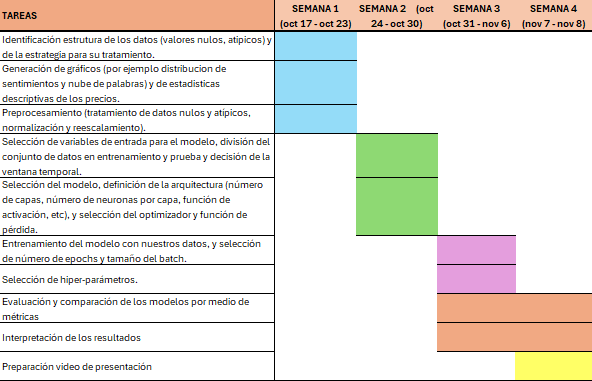

## **2. Datos**
---

###2.1 Origen

Los datos provienen del **dataset de precios históricos de criptomonedas**, disponible en Kaggle bajo el título *"Cryptocurrency Price History"*. Este dataset ha sido compilado a partir de múltiples fuentes que registran el comportamiento de los precios de diversas criptomonedas en diferentes exchanges. Se recopilan a partir de datos públicos sobre el mercado de criptomonedas, donde se registran las transacciones, volúmenes de compra/venta y precios de estas divisas a lo largo del tiempo.

### 2.2 Herramienta o proceso para la descarga de la información

Se utiliza la API de **Kaggle** para descargar los datos directamente al entorno de trabajo. Específicamente, se hace uso del comando `!kaggle datasets download`, que es parte de la herramienta de línea de comandos de Kaggle. Esta API permite acceder a datasets públicos disponibles en Kaggle y descargarlos automáticamente en el entorno donde estés trabajando (por ejemplo, Google Colab o Jupyter Notebooks). Luego de descargar el archivo, se utiliza la biblioteca de Python `zipfile` para extraer el contenido si está comprimido.

### 2.3  Tipo de datos

Estamos manejando **datos financieros históricos** de diferentes criptomonedas. Cada archivo CSV contiene registros de datos relacionados con el precio y volumen de transacciones de una criptomoneda específica. Las columnas típicas que se pueden encontrar incluyen:

- **Fecha (Date)**: La fecha del registro.
- **Precio de apertura (Open)**: El precio al que la criptomoneda abrió el día.
- **Precio más alto (High)**: El precio más alto alcanzado en el día.
- **Precio más bajo (Low)**: El precio más bajo alcanzado en el día.
- **Precio de cierre (Close)**: El precio al que la criptomoneda cerró el día.
- **Volumen (Volume)**: El volumen total de criptomonedas transaccionadas durante el día.
- **Capitalización de mercado (Market Cap)**: La capitalización de mercado calculada según el precio de la criptomoneda y la cantidad circulante.

Estos datos son usados para análisis financiero, predicciones de mercado y estrategias de trading en el ámbito de las criptomonedas.

## **3. Extracción**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/DeepLearning/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download sudalairajkumar/cryptocurrencypricehistory

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0
cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
import zipfile
import pandas as pd

# Extraer el archivo zip descargado
with zipfile.ZipFile("/content/cryptocurrencypricehistory.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/crypto_data")

# Ruta donde están los archivos extraídos
folder_path = "/content/crypto_data/"

# Lista de los archivos CSV que quieres leer
file_names = [
    "coin_Aave.csv", "coin_BinanceCoin.csv", "coin_Bitcoin.csv", "coin_Cardano.csv",
    "coin_ChainLink.csv", "coin_Cosmos.csv", "coin_CryptocomCoin.csv", "coin_Dogecoin.csv",
    "coin_EOS.csv", "coin_Ethereum.csv", "coin_Iota.csv", "coin_Litecoin.csv",
    "coin_Monero.csv", "coin_NEM.csv", "coin_Polkadot.csv", "coin_Solana.csv",
    "coin_Stellar.csv", "coin_Tether.csv", "coin_Tron.csv", "coin_USDCoin.csv",
    "coin_Uniswap.csv", "coin_WrappedBitcoin.csv", "coin_XRP.csv"
]

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer cada archivo CSV y almacenarlo en el diccionario
for file in file_names:
    file_path = os.path.join(folder_path, file)
    coin_name = file.replace("coin_", "").replace(".csv", "")  # Extraer el nombre de la criptomoneda
    dataframes[coin_name] = pd.read_csv(file_path)

bitcoin_data = dataframes['Bitcoin']

print(bitcoin_data.head(5))


   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


## **3. Analisis de los datos**
---

### **3.1. Resumen General**


In [ ]:

# Mostrar cuántos documentos (archivos CSV) tiene el dataset
num_documents = len(file_names)
print(f"El dataset contiene {num_documents} documentos (archivos CSV).")

# Formato de los datos
data_format = "CSV"
print(f"Los datos están guardados en formato {data_format}.")

# Calcular el tamaño total de los archivos CSV en la carpeta extraída
total_size_mb = 0
for file in file_names:
    file_path = os.path.join(folder_path, file)
    total_size_mb += os.path.getsize(file_path) / (1024 * 1024)  # Convertir de bytes a MB

print(f"El tamaño total del conjunto de datos es de {total_size_mb:.2f} MB.")

El dataset contiene 23 documentos (archivos CSV).
Los datos están guardados en formato CSV.
El tamaño total del conjunto de datos es de 4.54 MB.


In [ ]:

# Pregunta 1: ¿Qué variables contiene cada documento?
print("Las variables que contiene cada documento son:")
for coin_name, df in dataframes.items():
    print(f"Variables en {coin_name}: {list(df.columns)}")  # Mostrar nombres de las columnas

# Pregunta 2: ¿Cuántos registros tiene cada documento?
print("\nCantidad de registros en cada documento:")
for coin_name, df in dataframes.items():
    print(f"{coin_name}: {len(df)} registros")

# Pregunta 3: ¿Cuál es el rango de fechas de los datos?
print("\nRango de fechas de los datos en cada documento:")
for coin_name, df in dataframes.items():
    if 'Date' in df.columns:
        # Convertir la columna de fechas al formato datetime
        df['Date'] = pd.to_datetime(df['Date'])
        min_date = df['Date'].min()
        max_date = df['Date'].max()
        print(f"{coin_name}: Desde {min_date} hasta {max_date}")
    else:
        print(f"{coin_name}: No tiene columna de fechas.")

Las variables que contiene cada documento son:
Variables en Aave: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en BinanceCoin: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en Bitcoin: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en Cardano: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en ChainLink: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en Cosmos: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en CryptocomCoin: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en Dogecoin: ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
Variables en EOS: ['SNo', 'Name', 'Symbol', 'Date', 'Hig

### **3.2. Resumen de la Calidad de los datos**

In [ ]:
# Variable para almacenar información sobre problemas encontrados
documentos_vacios = []
documentos_mala_calidad = []
problemas_codificacion = []
mezcla_formatos = False


# Leer cada archivo CSV, buscar datos faltantes, documentos vacíos y problemas de codificación
for file in file_names:
    file_path = os.path.join(folder_path, file)
    coin_name = file.replace("coin_", "").replace(".csv", "")  # Extraer el nombre de la criptomoneda

    try:
        # Intentar leer el archivo CSV
        df = pd.read_csv(file_path)
        dataframes[coin_name] = df

        # Verificar si el archivo está vacío o tiene pocos registros
        if df.empty:
            documentos_vacios.append(coin_name)
        elif len(df) < 10:  # Si el documento tiene menos de 10 registros, lo consideramos de mala calidad
            documentos_mala_calidad.append(coin_name)

        # Verificar si hay datos faltantes
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f"{coin_name} tiene {missing_values} valores faltantes.")

        # Verificar mezcla de formatos: Comprobar si todas las columnas esperadas están presentes
        expected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
        if set(df.columns) != set(expected_columns):
            mezcla_formatos = True

    except UnicodeDecodeError:
        problemas_codificacion.append(coin_name)

# Pregunta 1: ¿Hay documentos vacíos o de mala calidad?
if documentos_vacios:
    print(f"Documentos vacíos: {documentos_vacios}")
else:
    print("No hay documentos vacíos.")

if documentos_mala_calidad:
    print(f"Documentos con pocos registros (mala calidad): {documentos_mala_calidad}")
else:
    print("No hay documentos con mala calidad.")

# Pregunta 2: ¿Existen documentos ilegibles o con problemas de codificación?
if problemas_codificacion:
    print(f"Documentos con problemas de codificación: {problemas_codificacion}")
else:
    print("No se encontraron problemas de codificación.")

# Pregunta 3: ¿Hay mezcla de formatos en el conjunto?
if mezcla_formatos:
    print("Hay mezcla de formatos en algunos documentos.")
else:
    print("No se encontraron mezclas de formatos en el conjunto.")

No hay documentos vacíos.
No hay documentos con mala calidad.
No se encontraron problemas de codificación.
Hay mezcla de formatos en algunos documentos.


### **3.3. Tipos de variables**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


variable_objetivo = 'Close'
print(f"La variable objetivo es: {variable_objetivo}, y es continua.")

La variable objetivo es: Close, y es continua.


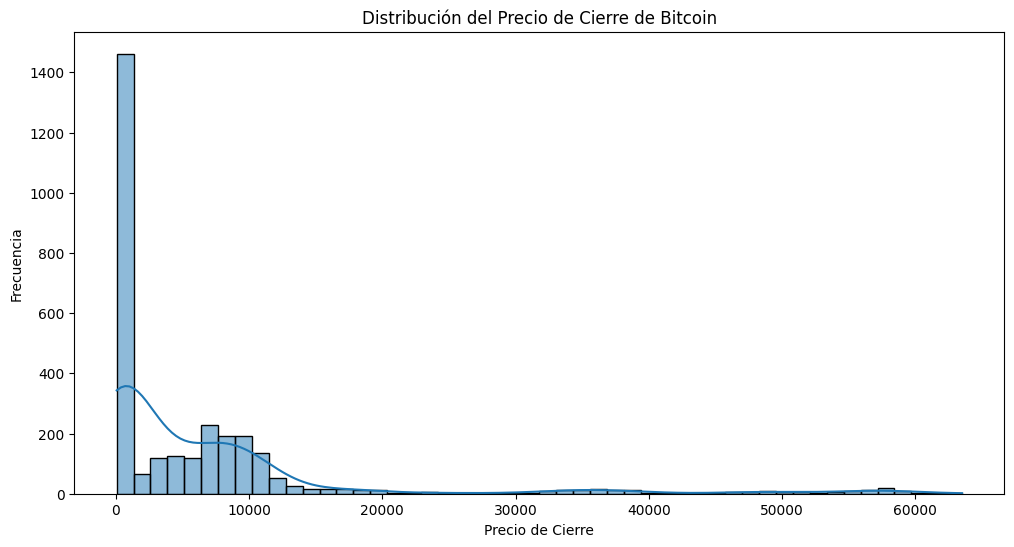


Estadísticas descriptivas de la variable objetivo:
count     2991.000000
mean      6711.290443
std      11298.141921
min         68.431000
25%        430.569489
50%       2286.409912
75%       8576.238715
max      63503.457930
Name: Close, dtype: float64


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(bitcoin_data[variable_objetivo], bins=50, kde=True)
plt.title('Distribución del Precio de Cierre de Bitcoin')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de la variable objetivo
print("\nEstadísticas descriptivas de la variable objetivo:")
print(bitcoin_data[variable_objetivo].describe())

# Verificar desbalanceo (en este caso no aplicaría ya que es continua)


Análisis descriptivo de otras variables:

Variables en Aave:
              SNo        High         Low        Open       Close  \
count  275.000000  275.000000  275.000000  275.000000  275.000000   
mean   138.000000  271.306751  237.736035  254.506688  255.525845   
std     79.529869  173.030432  151.302431  162.067209  161.649917   
min      1.000000   28.433069   25.966155   27.715080   27.715084   
25%     69.500000   85.078206   76.038104   80.557436   81.100120   
50%    138.000000  306.990536  274.746278  292.268571  295.089229   
75%    206.500000  407.518278  361.685763  382.275163  382.579255   
max    275.000000  666.864979  565.749887  629.231665  632.266488   

             Volume     Marketcap  
count  2.750000e+02  2.750000e+02  
mean   5.023421e+08  3.168639e+09  
std    4.527200e+08  2.066558e+09  
min    0.000000e+00  6.713004e+07  
25%    2.400042e+08  9.736814e+08  
50%    3.693558e+08  3.697227e+09  
75%    6.204643e+08  4.784464e+09  
max    2.838573e+09  8.06321

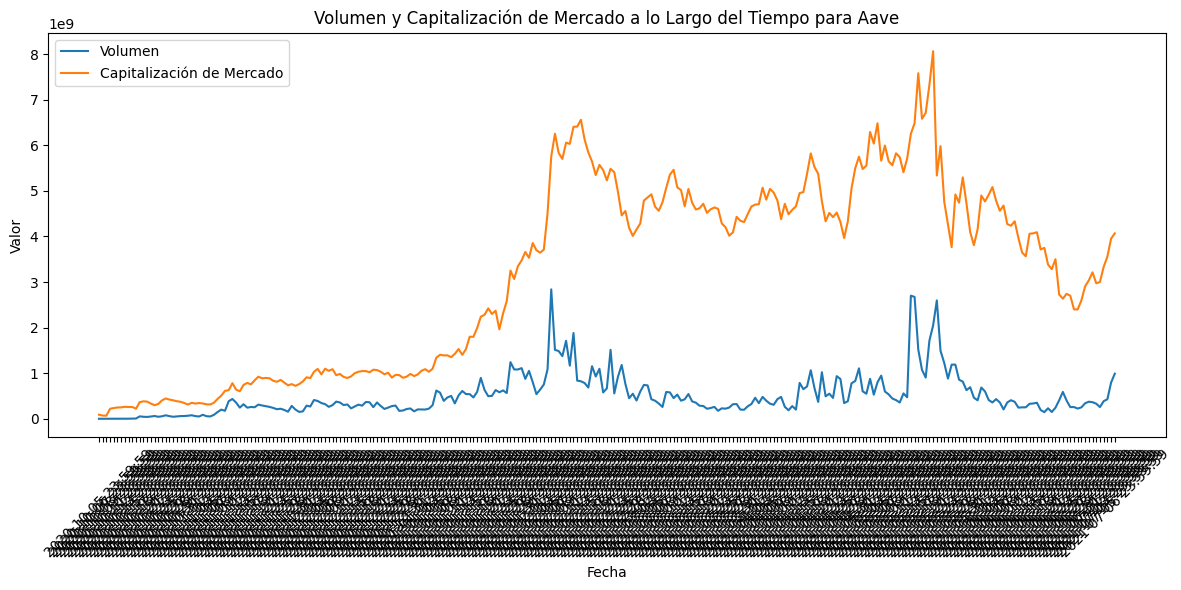


Variables en BinanceCoin:
               SNo         High          Low         Open        Close  \
count  1442.000000  1442.000000  1442.000000  1442.000000  1442.000000   
mean    721.500000    54.764100    49.165813    52.028231    52.250308   
std     416.413857   121.675817   108.118454   115.170060   115.390917   
min       1.000000     0.101211     0.096109     0.099721     0.099867   
25%     361.250000    10.390750     9.677340    10.037860    10.068350   
50%     721.500000    16.592114    15.727250    16.210328    16.210569   
75%    1081.750000    28.240910    26.963038    27.669888    27.691107   
max    1442.000000   690.931965   631.465298   676.315905   675.684077   

             Volume     Marketcap  
count  1.442000e+03  1.442000e+03  
mean   6.269804e+08  7.835575e+09  
std    1.479775e+09  1.780041e+10  
min    9.284190e+03  9.986680e+06  
25%    5.089148e+07  1.157863e+09  
50%    1.981830e+08  2.451099e+09  
75%    3.942378e+08  4.061743e+09  
max    1.798295e+1

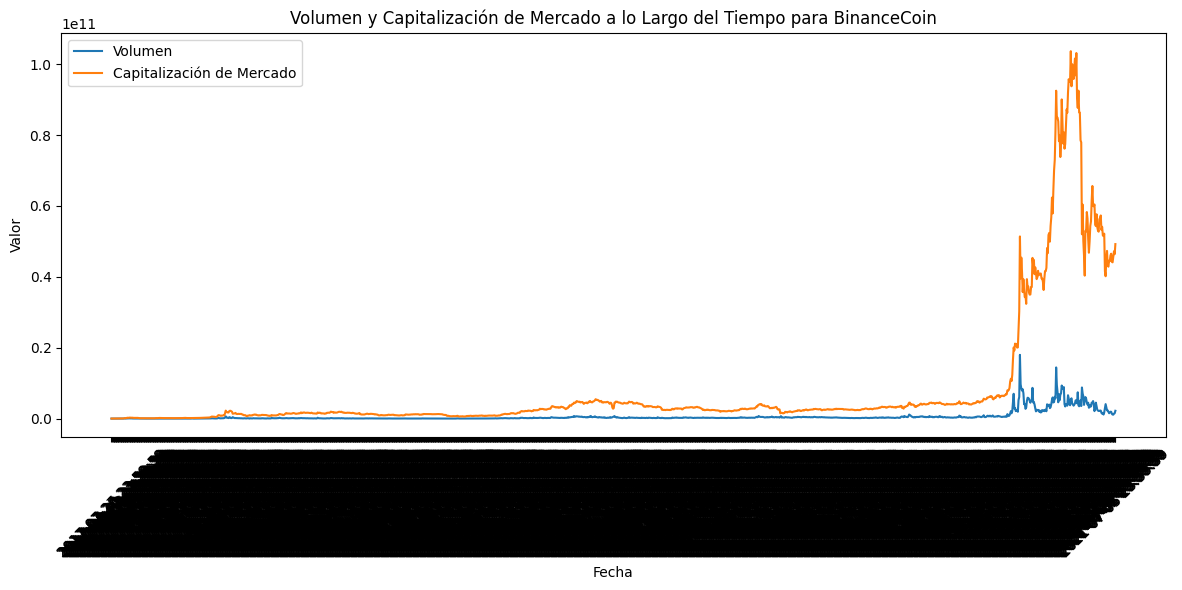


Variables en Bitcoin:
               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1

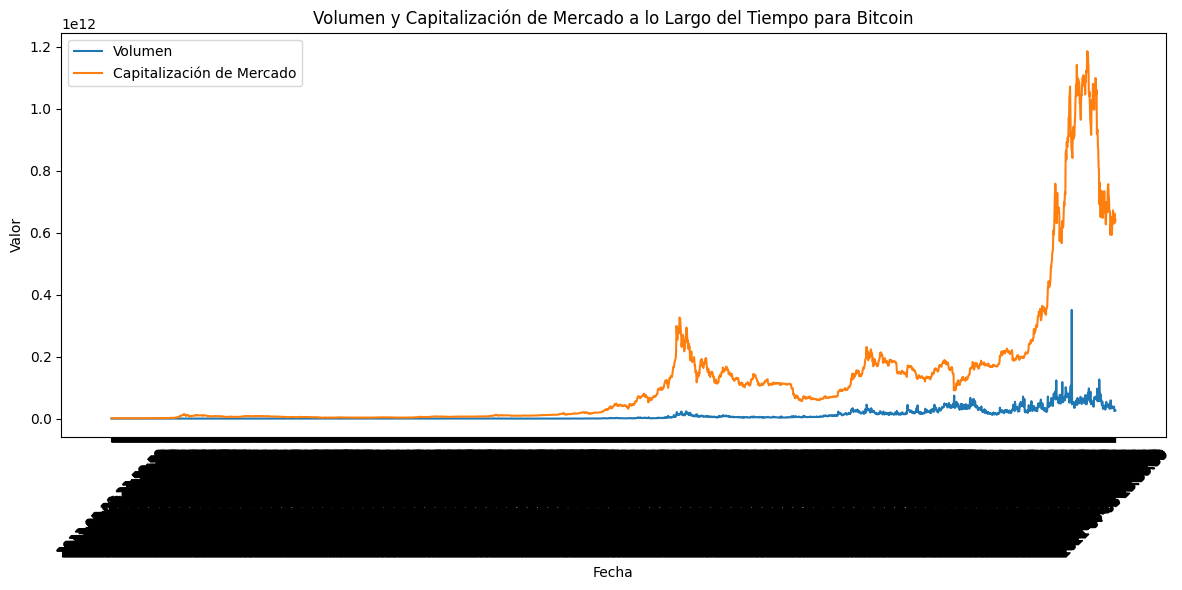


Variables en Cardano:
               SNo         High          Low         Open        Close  \
count  1374.000000  1374.000000  1374.000000  1374.000000  1374.000000   
mean    687.500000     0.269807     0.239710     0.255287     0.256313   
std     396.783946     0.433523     0.380928     0.408456     0.409691   
min       1.000000     0.021050     0.017620     0.018414     0.018539   
25%     344.250000     0.047565     0.044601     0.045898     0.045947   
50%     687.500000     0.090274     0.083164     0.086867     0.087002   
75%    1030.750000     0.194519     0.172442     0.181374     0.183379   
max    1374.000000     2.461766     2.013285     2.300190     2.309113   

             Volume     Marketcap  
count  1.374000e+03  1.374000e+03  
mean   8.934183e+08  7.603454e+09  
std    2.107653e+09  1.303878e+10  
min    1.739460e+06  4.806646e+08  
25%    5.014830e+07  1.191263e+09  
50%    1.186742e+08  2.270889e+09  
75%    4.875977e+08  5.174547e+09  
max    1.914198e+10  7

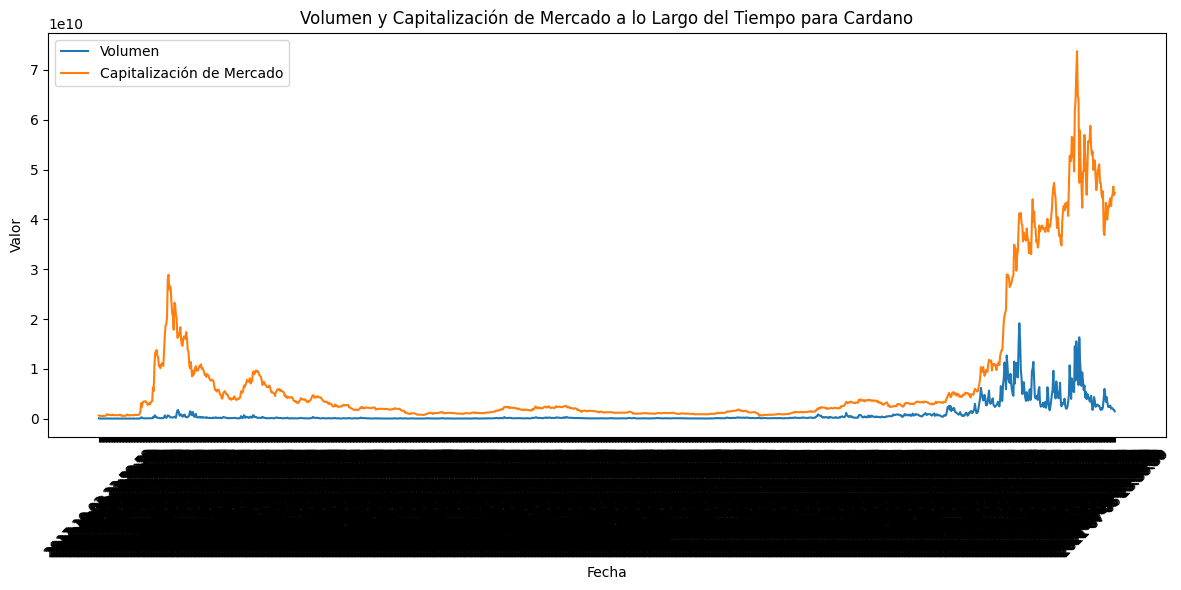


Variables en ChainLink:
               SNo         High          Low         Open        Close  \
count  1385.000000  1385.000000  1385.000000  1385.000000  1385.000000   
mean    693.000000     6.633357     5.920968     6.294481     6.308583   
std     399.959373    10.447740     9.227001     9.893310     9.898517   
min       1.000000     0.157440     0.126297     0.131110     0.131129   
25%     347.000000     0.445228     0.400721     0.427648     0.426929   
50%     693.000000     1.947046     1.824926     1.881174     1.886506   
75%    1039.000000     8.167029     7.413322     7.670921     7.772912   
max    1385.000000    52.876089    46.729217    52.247689    52.198697   

             Volume     Marketcap  
count  1.385000e+03  1.385000e+03  
mean   6.923608e+08  2.494642e+09  
std    4.670354e+09  4.125241e+09  
min    3.987730e+05  4.589515e+07  
25%    5.524822e+06  1.494251e+08  
50%    7.745403e+07  6.602770e+08  
75%    7.355114e+08  2.720519e+09  
max    1.705493e+11 

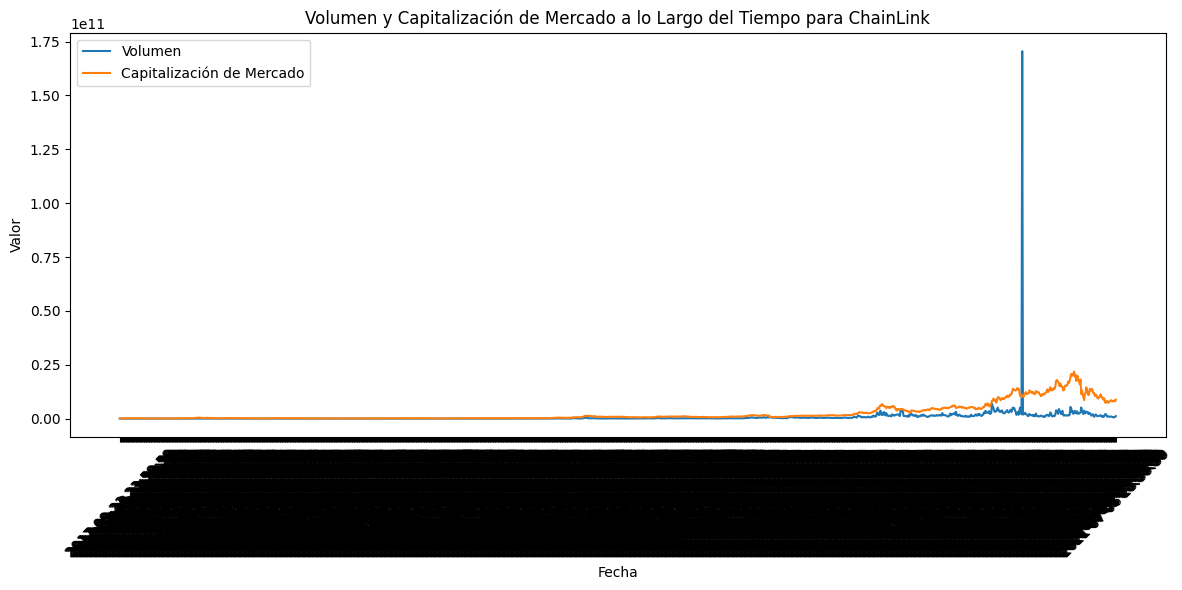


Variables en Cosmos:
              SNo        High         Low        Open       Close  \
count  845.000000  845.000000  845.000000  845.000000  845.000000   
mean   423.000000    7.141688    6.367329    6.759896    6.768099   
std    244.074784    6.347047    5.496657    5.930911    5.936096   
min      1.000000    1.813534    1.130963    1.652300    1.649203   
25%    212.000000    3.533852    3.193769    3.347086    3.346352   
50%    423.000000    4.687904    4.285959    4.476964    4.480583   
75%    634.000000    6.536582    5.838377    6.221525    6.221525   
max    845.000000   32.136865   26.906526   29.482372   29.435150   

             Volume     Marketcap  
count  8.450000e+02  8.450000e+02  
mean   2.963413e+08  1.332950e+09  
std    3.513583e+08  1.307956e+09  
min    2.567201e+06  0.000000e+00  
25%    1.216053e+08  5.611565e+08  
50%    1.799694e+08  8.437392e+08  
75%    3.140994e+08  1.229058e+09  
max    3.365948e+09  6.203966e+09  


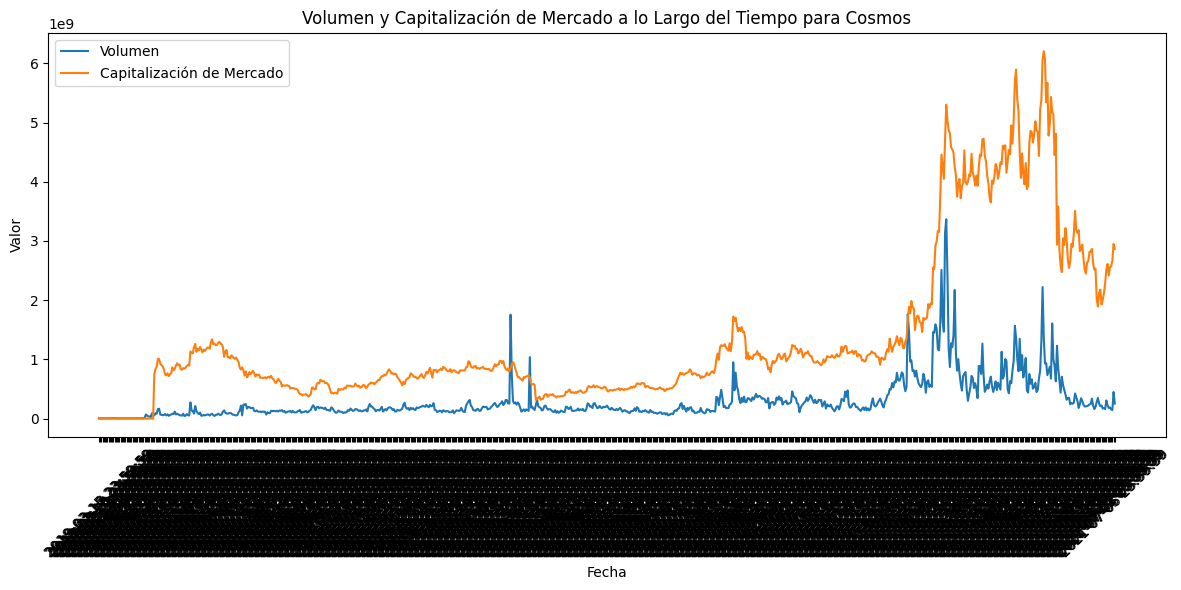


Variables en CryptocomCoin:
             SNo        High         Low        Open       Close  \
count  935.00000  935.000000  935.000000  935.000000  935.000000   
mean   468.00000    0.085467    0.078565    0.081802    0.081912   
std    270.05555    0.055912    0.051567    0.053707    0.053693   
min      1.00000    0.012463    0.011487    0.012164    0.012133   
25%    234.50000    0.042306    0.039469    0.040979    0.041072   
50%    468.00000    0.068313    0.062851    0.065295    0.065431   
75%    701.50000    0.121664    0.112010    0.115961    0.116189   
max    935.00000    0.270960    0.234816    0.246416    0.246848   

             Volume     Marketcap  
count  9.350000e+02  9.350000e+02  
mean   5.003678e+07  1.485326e+09  
std    9.611248e+07  1.456005e+09  
min    7.388051e+04  0.000000e+00  
25%    5.441613e+06  4.003142e+08  
50%    1.699123e+07  7.591310e+08  
75%    6.591552e+07  2.549040e+09  
max    1.993686e+09  6.236131e+09  


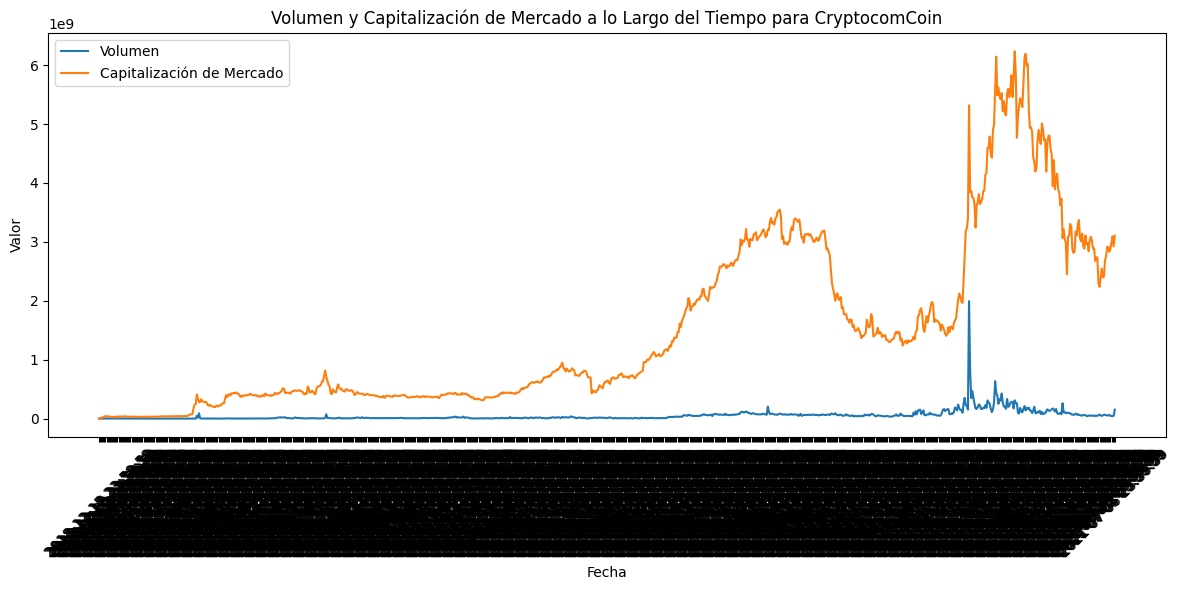


Variables en Dogecoin:
               SNo         High          Low         Open        Close  \
count  2760.000000  2760.000000  2760.000000  2760.000000  2760.000000   
mean   1380.500000     0.014964     0.012402     0.013669     0.013763   
std     796.887696     0.069103     0.055536     0.062347     0.062559   
min       1.000000     0.000089     0.000085     0.000087     0.000087   
25%     690.750000     0.000231     0.000222     0.000227     0.000226   
50%    1380.500000     0.001914     0.001772     0.001849     0.001844   
75%    2070.250000     0.002986     0.002796     0.002900     0.002899   
max    2760.000000     0.737567     0.608168     0.687801     0.684777   

             Volume     Marketcap  
count  2.760000e+03  2.760000e+03  
mean   4.326321e+08  1.760533e+09  
std    2.807320e+09  8.115186e+09  
min    0.000000e+00  1.509085e+06  
25%    2.536138e+05  2.337892e+07  
50%    5.582480e+06  2.135789e+08  
75%    5.098244e+07  3.488812e+08  
max    6.941068e+10  

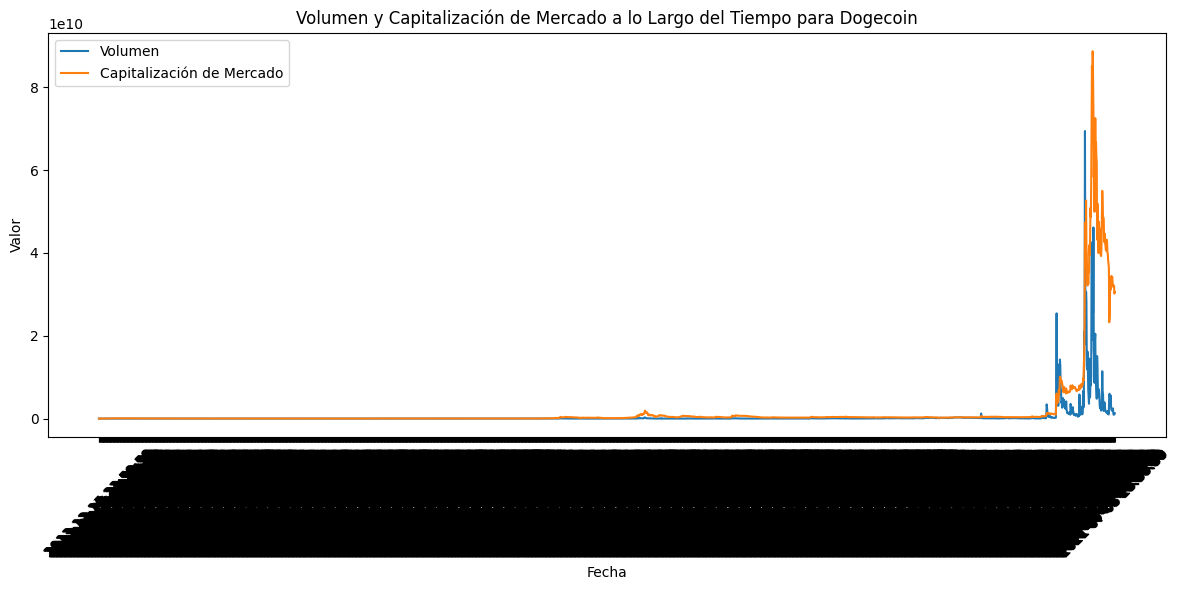


Variables en EOS:
              SNo         High          Low         Open        Close  \
count  1466.00000  1466.000000  1466.000000  1466.000000  1466.000000   
mean    733.50000     4.839459     4.384314     4.623294     4.624088   
std     423.34206     3.355341     2.909707     3.145615     3.141473   
min       1.00000     0.518657     0.480196     0.492790     0.493225   
25%     367.25000     2.694807     2.566841     2.631688     2.632416   
50%     733.50000     3.734605     3.502376     3.617169     3.621721   
75%    1099.75000     5.955663     5.442724     5.745512     5.746104   
max    1466.00000    22.890400    18.877399    21.639099    21.542601   

             Volume     Marketcap  
count  1.466000e+03  1.466000e+03  
mean   1.888406e+09  3.941338e+09  
std    1.774766e+09  2.585692e+09  
min    4.556540e+06  0.000000e+00  
25%    6.850824e+08  2.436551e+09  
50%    1.590850e+09  3.323401e+09  
75%    2.517552e+09  4.975189e+09  
max    2.032871e+10  1.776945e+10  

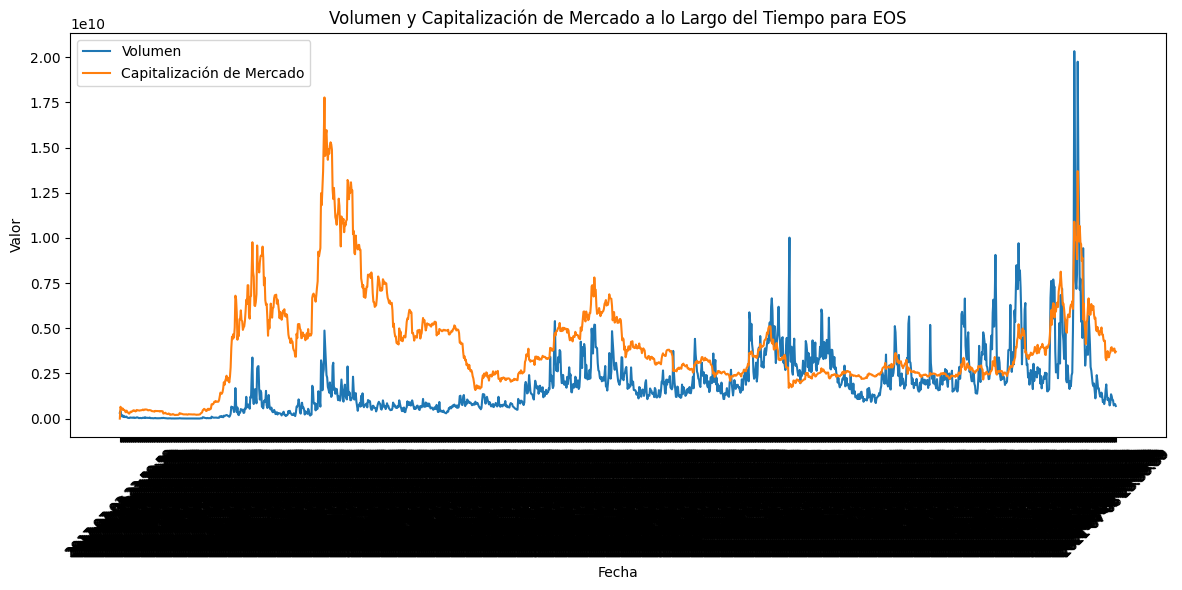


Variables en Ethereum:
               SNo         High          Low         Open        Close  \
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000   
mean   1080.500000   398.258568   365.592589   382.879899   383.910691   
std     623.682612   628.082281   566.611523   599.719862   601.078766   
min       1.000000     0.482988     0.420897     0.431589     0.434829   
25%     540.750000    14.265225    13.190950    13.757600    13.819200   
50%    1080.500000   205.124631   193.302715   198.425096   198.643691   
75%    1620.250000   396.494561   375.146804   386.264935   386.435272   
max    2160.000000  4362.350542  3785.848603  4174.635873  4168.701049   

             Volume     Marketcap  
count  2.160000e+03  2.160000e+03  
mean   7.057058e+09  4.172084e+10  
std    1.064526e+10  6.909184e+10  
min    1.021280e+05  3.221363e+07  
25%    3.825102e+07  1.135576e+09  
50%    2.148880e+09  2.070063e+10  
75%    9.629136e+09  4.231010e+10  
max    8.448291e+10  

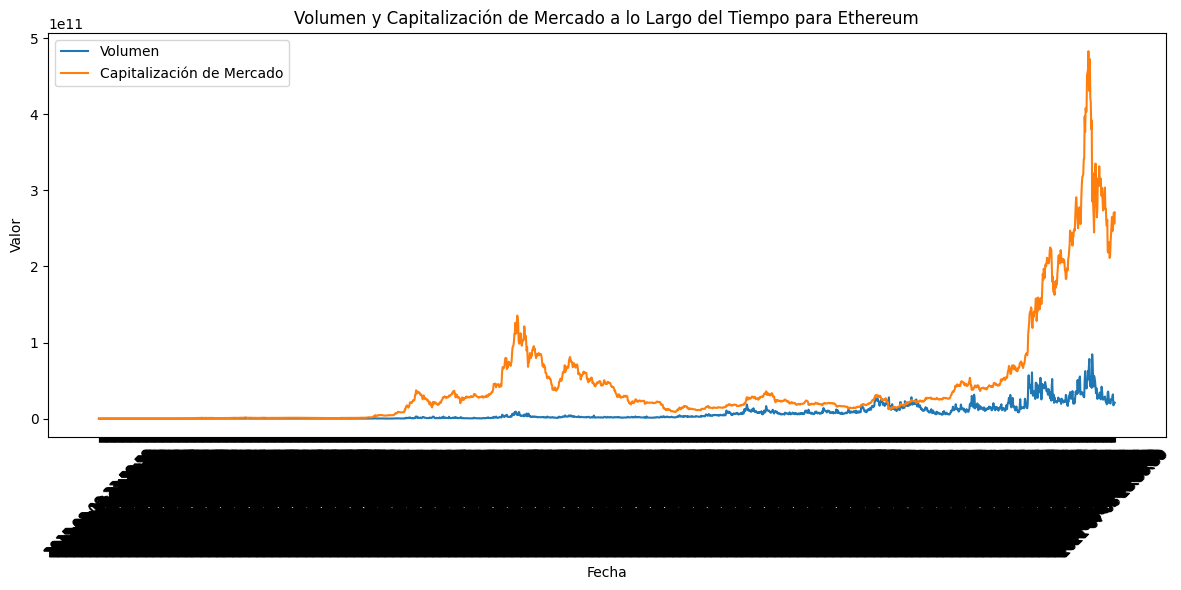


Variables en Iota:
               SNo         High          Low         Open        Close  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean    742.500000     0.772344     0.681014     0.729461     0.729370   
std     428.538213     0.864056     0.723861     0.798628     0.797611   
min       1.000000     0.124736     0.079620     0.110250     0.110195   
25%     371.750000     0.277188     0.260181     0.269682     0.269657   
50%     742.500000     0.393942     0.356185     0.372516     0.373394   
75%    1113.250000     0.999924     0.900324     0.964960     0.965021   
max    1484.000000     5.690020     4.861360     5.371050     5.366330   

             Volume     Marketcap  
count  1.484000e+03  1.484000e+03  
mean   5.672587e+07  2.027295e+09  
std    1.226599e+08  2.216986e+09  
min    2.334640e+06  3.062894e+08  
25%    1.006166e+07  7.495212e+08  
50%    1.939756e+07  1.037859e+09  
75%    4.899553e+07  2.682306e+09  
max    2.126970e+09  1.49

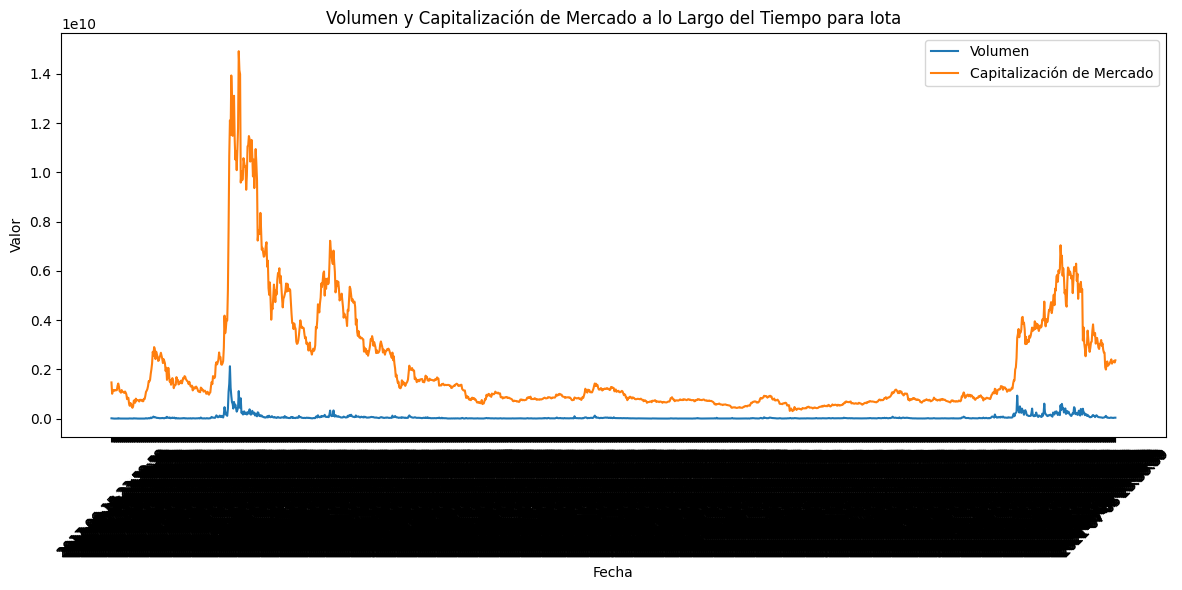


Variables en Litecoin:
               SNo         High          Low         Open        Close  \
count  2991.000000  2991.000000  2991.000000  2991.000000  2991.000000   
mean   1496.000000    51.344396    46.931226    49.247365    49.279008   
std     863.571653    66.572301    59.474423    63.256275    63.240464   
min       1.000000     1.344810     1.113740     1.153240     1.157010   
25%     748.500000     3.841130     3.730025     3.792325     3.794135   
50%    1496.000000    31.386569    27.855200    29.737400    29.900200   
75%    2243.500000    64.241222    60.338469    61.976711    62.025043   
max    2991.000000   412.960141   345.298839   387.869178   386.450779   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.284851e+09  2.934139e+09  
std    2.247871e+09  3.964279e+09  
min    0.000000e+00  3.789242e+07  
25%    2.242845e+06  1.614311e+08  
50%    1.158300e+08  1.477191e+09  
75%    2.108696e+09  3.854304e+09  
max    1.799426e+10  

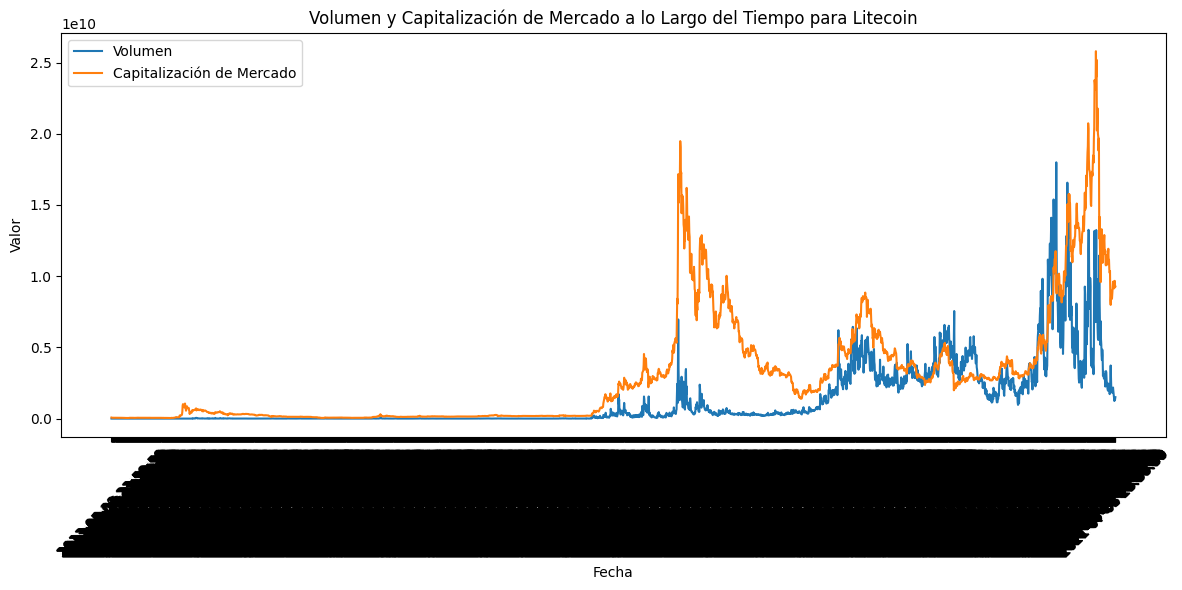


Variables en Monero:
               SNo         High          Low         Open        Close  \
count  2602.000000  2602.000000  2602.000000  2602.000000  2602.000000   
mean   1301.500000    77.357637    70.481496    74.069198    74.134773   
std     751.277024    96.070702    85.520895    91.188680    91.180556   
min       1.000000     0.251757     0.212967     0.220121     0.223522   
25%     651.250000     1.706342     1.472560     1.575765     1.588685   
50%    1301.500000    52.737242    49.691152    51.254060    51.337759   
75%    1951.750000   105.886750    99.589450   103.467749   102.915250   
max    2602.000000   517.620245   453.390991   483.709977   483.583612   

             Volume     Marketcap  
count  2.602000e+03  2.602000e+03  
mean   1.637467e+08  1.236534e+09  
std    9.193947e+08  1.534699e+09  
min    7.899570e+03  1.279606e+06  
25%    1.735218e+05  9.731418e+06  
50%    2.466770e+07  8.558357e+08  
75%    1.034612e+08  1.708818e+09  
max    2.895912e+10  8.

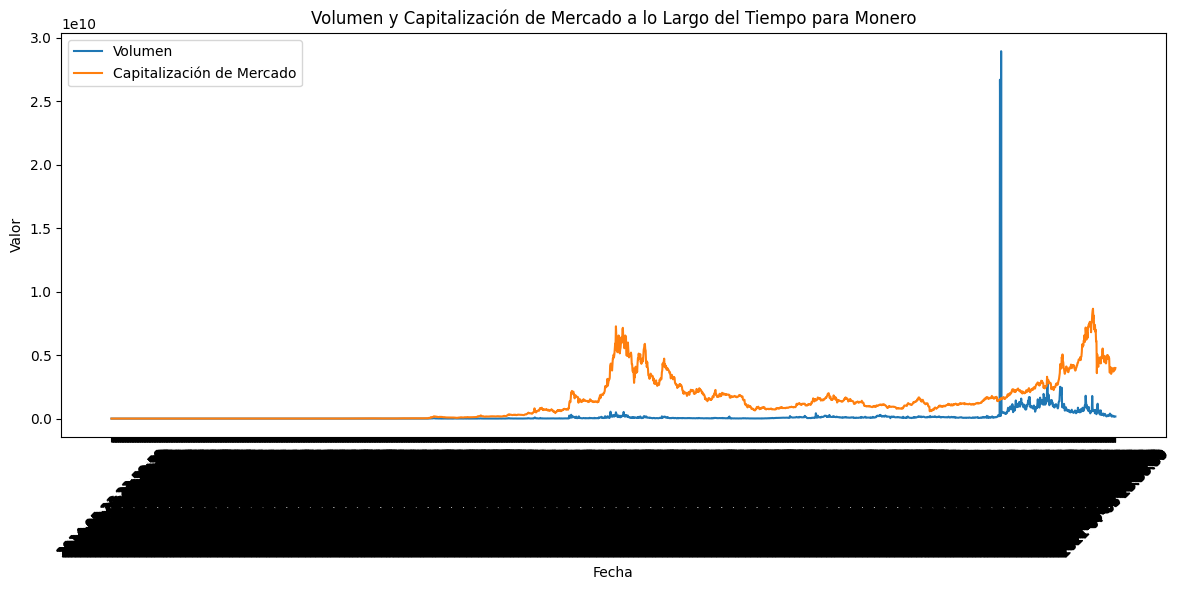


Variables en NEM:
              SNo         High          Low         Open        Close  \
count  2288.00000  2288.000000  2288.000000  2288.000000  2288.000000   
mean   1144.50000     0.132112     0.116248     0.124703     0.124662   
std     660.63303     0.213759     0.179739     0.198448     0.197990   
min       1.00000     0.000089     0.000079     0.000086     0.000086   
25%     572.75000     0.005281     0.004803     0.005003     0.005005   
50%    1144.50000     0.055468     0.051347     0.053189     0.053232   
75%    1716.25000     0.181424     0.164430     0.174522     0.174566   
max    2288.00000     2.091880     1.626020     1.835580     1.842720   

             Volume     Marketcap  
count  2.288000e+03  2.288000e+03  
mean   4.428130e+07  1.121956e+09  
std    2.138735e+08  1.781909e+09  
min    6.905080e+01  7.714359e+05  
25%    1.265158e+05  4.504833e+07  
50%    1.064993e+07  4.790889e+08  
75%    3.008101e+07  1.571092e+09  
max    8.707254e+09  1.658448e+10  

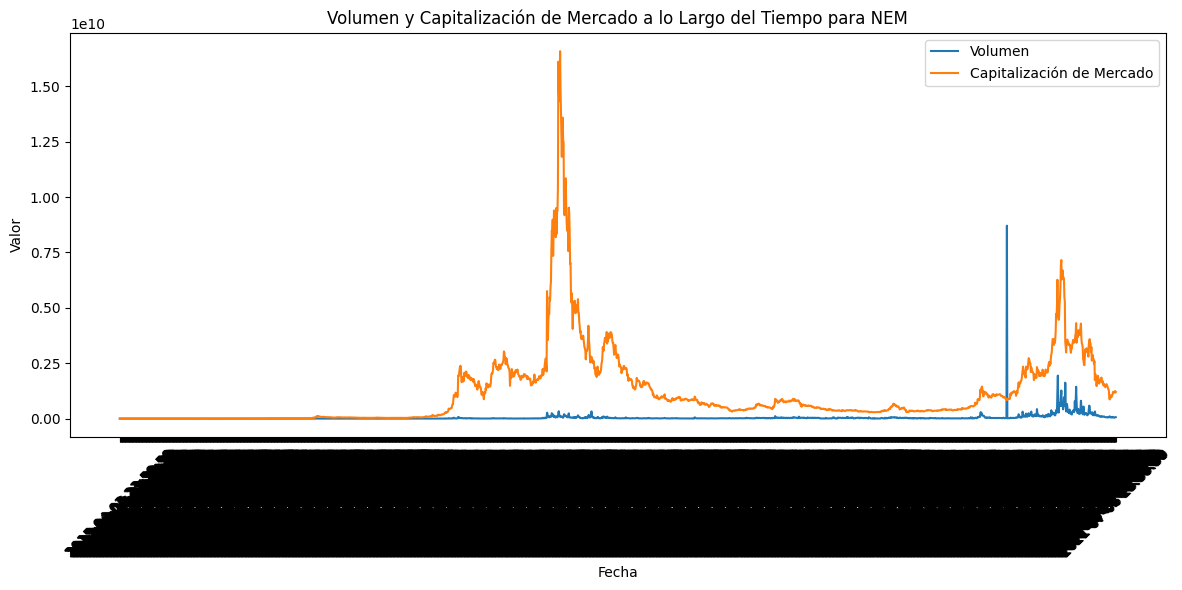


Variables en Polkadot:
              SNo        High         Low        Open       Close  \
count  320.000000  320.000000  320.000000  320.000000  320.000000   
mean   160.500000   19.131720   16.957486   18.107145   18.143080   
std     92.520268   14.481531   12.917678   13.762707   13.735707   
min      1.000000    3.090093    2.730919    2.878570    2.875028   
25%     80.750000    5.132771    4.648561    4.858942    4.883383   
50%    160.500000   16.671923   14.862697   15.793144   15.979432   
75%    240.250000   34.267825   29.942827   32.720427   32.742904   
max    320.000000   49.692960   42.976323   47.959780   47.945940   

             Volume     Marketcap  
count  3.200000e+02  3.200000e+02  
mean   2.006507e+09  1.653354e+10  
std    1.692224e+09  1.305124e+10  
min    4.931314e+07  0.000000e+00  
25%    6.073563e+08  4.191878e+09  
50%    1.605773e+09  1.487376e+10  
75%    2.942210e+09  3.027253e+10  
max    1.007000e+10  4.497358e+10  


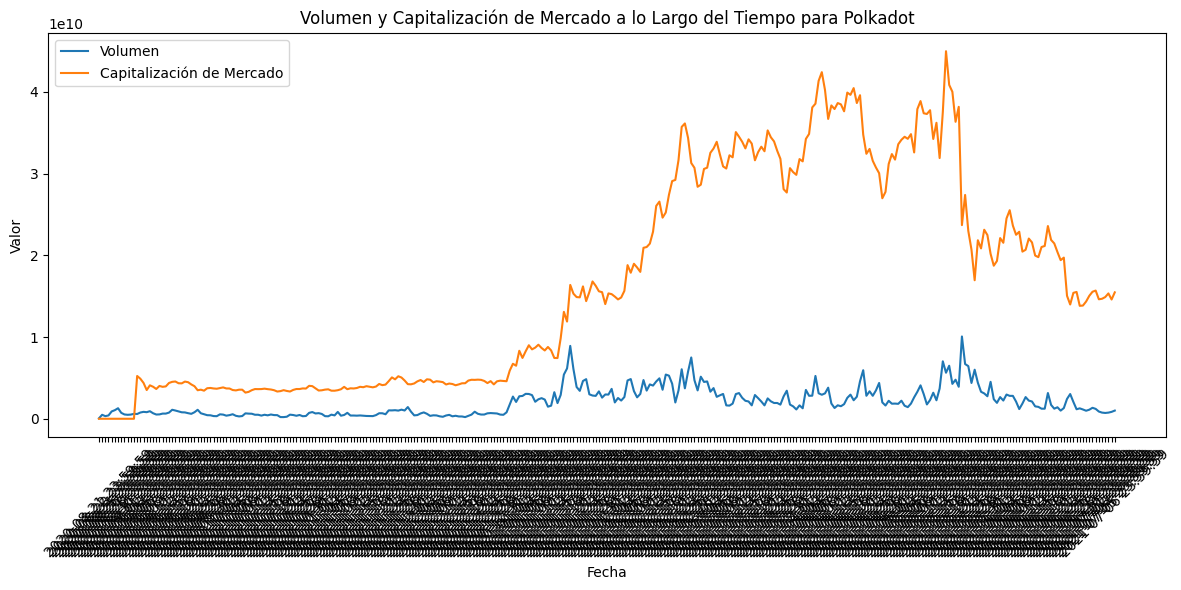


Variables en Solana:
              SNo        High         Low        Open       Close  \
count  452.000000  452.000000  452.000000  452.000000  452.000000   
mean   226.500000   11.190482    9.647555   10.400225   10.471388   
std    130.625419   15.148788   13.006301   14.082328   14.114444   
min      1.000000    0.559759    0.505194    0.513391    0.515273   
25%    113.750000    1.484753    1.311024    1.410480    1.424761   
50%    226.500000    3.018518    2.483870    2.867550    2.881389   
75%    339.250000   15.270240   13.774265   14.262057   14.362851   
max    452.000000   58.302927   46.187557   56.089257   55.910960   

             Volume     Marketcap  
count  4.520000e+02  4.520000e+02  
mean   1.956751e+08  2.588164e+09  
std    3.906998e+08  3.985932e+09  
min    6.520201e+05  0.000000e+00  
25%    7.851473e+06  3.056948e+07  
50%    1.858893e+07  1.042625e+08  
75%    1.802343e+08  3.811371e+09  
max    2.772225e+09  1.524342e+10  


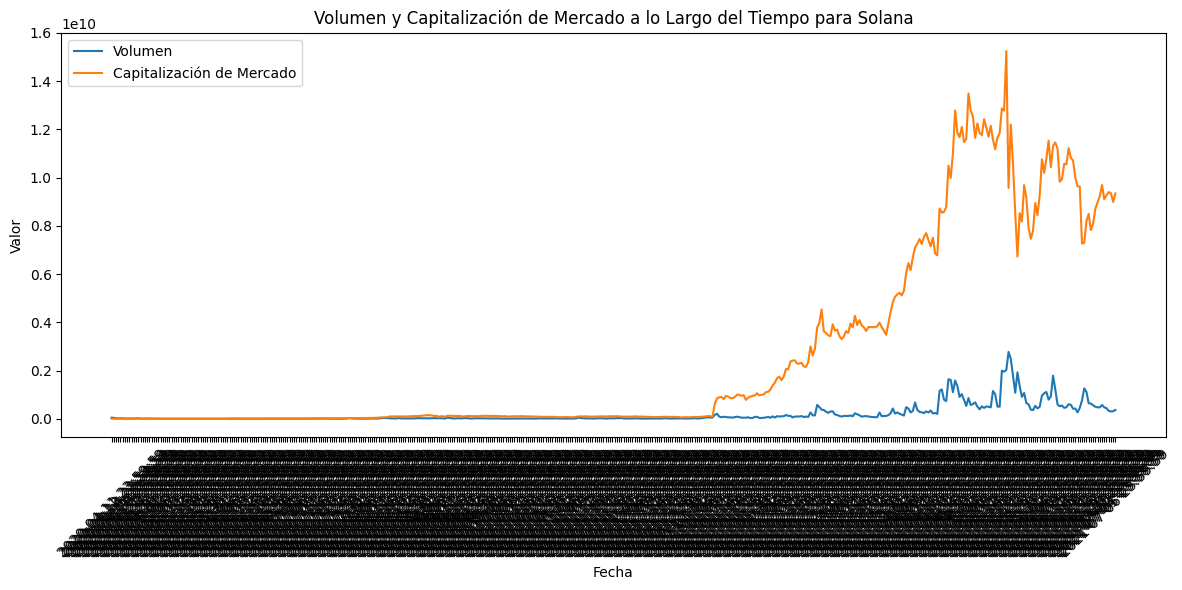


Variables en Stellar:
               SNo         High          Low         Open        Close  \
count  2527.000000  2527.000000  2527.000000  2527.000000  2527.000000   
mean   1264.000000     0.106980     0.095780     0.101413     0.101509   
std     729.626388     0.150700     0.131285     0.141105     0.141125   
min       1.000000     0.001509     0.001227     0.001352     0.001357   
25%     632.500000     0.002555     0.002325     0.002441     0.002449   
50%    1264.000000     0.052033     0.047695     0.049505     0.049441   
75%    1895.500000     0.128354     0.119867     0.124293     0.124355   
max    2527.000000     0.938144     0.677496     0.892399     0.896227   

             Volume     Marketcap  
count  2.527000e+03  2.527000e+03  
mean   2.515161e+08  2.019410e+09  
std    6.308333e+08  2.953213e+09  
min    4.910920e+02  9.663695e+05  
25%    4.723715e+04  1.277635e+07  
50%    4.279170e+07  9.792163e+08  
75%    2.338594e+08  2.404003e+09  
max    1.040858e+10  1

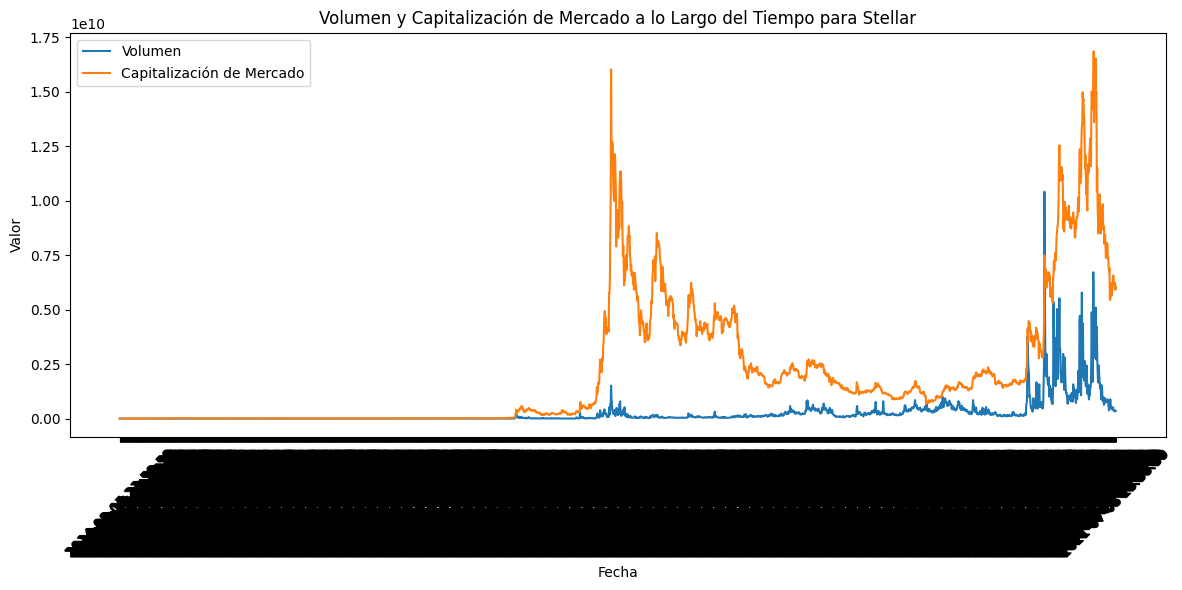


Variables en Tether:
               SNo         High          Low         Open        Close  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000   
mean   1159.500000     1.006776     0.995670     1.000656     1.000696   
std     669.293284     0.018511     0.016425     0.015449     0.014951   
min       1.000000     0.606229     0.568314     0.571249     0.606229   
25%     580.250000     1.000000     0.994445     1.000000     1.000000   
50%    1159.500000     1.003205     0.999677     1.000010     1.000020   
75%    1738.750000     1.011339     1.000000     1.002278     1.002228   
max    2318.000000     1.212320     1.194710     1.210420     1.205740   

             Volume     Marketcap  
count  2.318000e+03  2.318000e+03  
mean   1.938484e+10  6.128741e+09  
std    3.485057e+10  1.262068e+10  
min    1.104970e-01  1.525272e+05  
25%    9.858018e+05  6.951590e+06  
50%    2.507340e+09  2.021074e+09  
75%    2.460318e+10  4.133154e+09  
max    2.790675e+11  6.

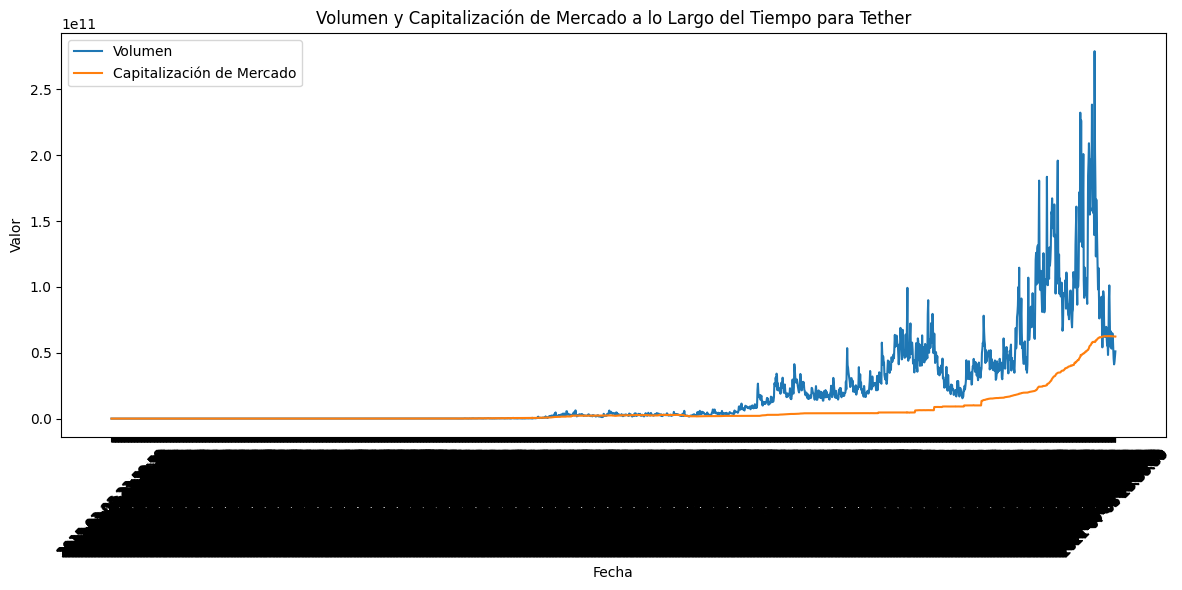


Variables en Tron:
               SNo         High          Low         Open        Close  \
count  1392.000000  1392.000000  1392.000000  1392.000000  1392.000000   
mean    696.500000     0.034403     0.030652     0.032553     0.032585   
std     401.980099     0.030277     0.024737     0.027625     0.027562   
min       1.000000     0.001831     0.001091     0.001419     0.001427   
25%     348.750000     0.017335     0.016197     0.016795     0.016804   
50%     696.500000     0.025453     0.023790     0.024581     0.024627   
75%    1044.250000     0.038529     0.033849     0.036366     0.036416   
max    1392.000000     0.300363     0.176712     0.224499     0.220555   

             Volume     Marketcap  
count  1.392000e+03  1.392000e+03  
mean   9.459435e+08  2.224104e+09  
std    1.240489e+09  1.932420e+09  
min    2.647480e+04  0.000000e+00  
25%    1.975095e+08  1.120512e+09  
50%    6.496156e+08  1.656501e+09  
75%    1.242293e+09  2.431134e+09  
max    1.397316e+10  1.45

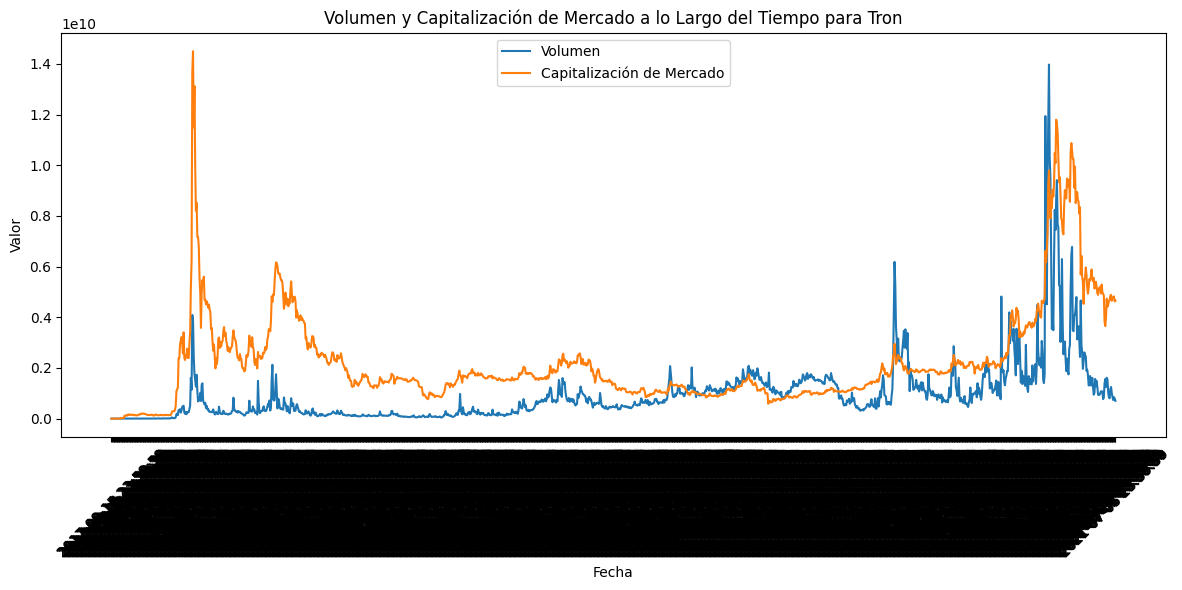


Variables en USDCoin:
               SNo         High          Low         Open        Close  \
count  1002.000000  1002.000000  1002.000000  1002.000000  1002.000000   
mean    501.500000     1.010327     0.998496     1.003767     1.003791   
std     289.396786     0.011015     0.007548     0.006843     0.006822   
min       1.000000     1.000082     0.929222     0.967938     0.970124   
25%     251.250000     1.001768     0.996038     1.000019     1.000017   
50%     501.500000     1.007303     0.999263     1.001087     1.001152   
75%     751.750000     1.015262     1.000149     1.005420     1.005395   
max    1002.000000     1.113730     1.023058     1.043627     1.044029   

             Volume     Marketcap  
count  1.002000e+03  1.002000e+03  
mean   6.513472e+08  3.029697e+09  
std    8.595553e+08  5.541499e+09  
min    1.088030e+05  0.000000e+00  
25%    1.058256e+08  3.592595e+08  
50%    3.178717e+08  4.838460e+08  
75%    7.773591e+08  2.807820e+09  
max    8.053431e+09  2

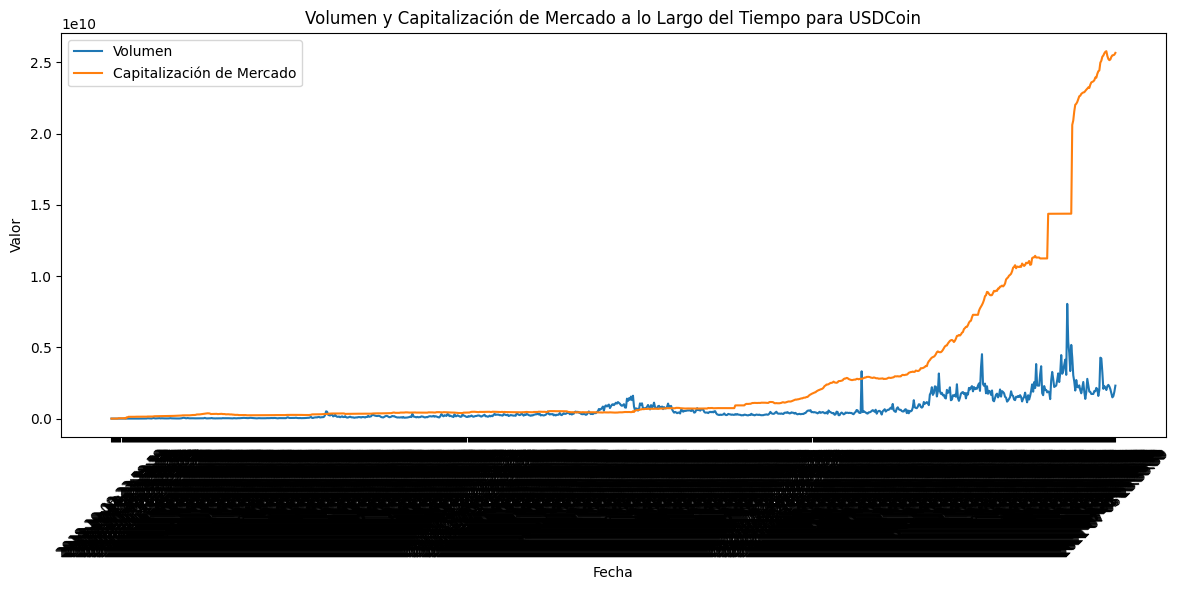


Variables en Uniswap:
              SNo        High         Low        Open       Close  \
count  292.000000  292.000000  292.000000  292.000000  292.000000   
mean   146.500000   18.091303   15.934440   17.014778   17.077256   
std     84.437354   13.471833   12.092454   12.802318   12.775789   
min      1.000000    2.160387    1.763817    1.930123    1.930119   
25%     73.750000    3.931123    3.529418    3.762985    3.765402   
50%    146.500000   19.537960   16.803973   18.144702   18.398028   
75%    219.250000   29.421740   26.685689   28.477360   28.397028   
max    292.000000   44.974063   41.576133   43.083324   43.164506   

             Volume     Marketcap  
count  2.920000e+02  2.920000e+02  
mean   1.061551e+09  7.950668e+09  
std    9.518486e+08  7.319259e+09  
min    1.893552e+08  2.712318e+08  
25%    5.059416e+08  8.483064e+08  
50%    7.634183e+08  6.104860e+09  
75%    1.234958e+09  1.494493e+10  
max    6.372858e+09  2.259162e+10  


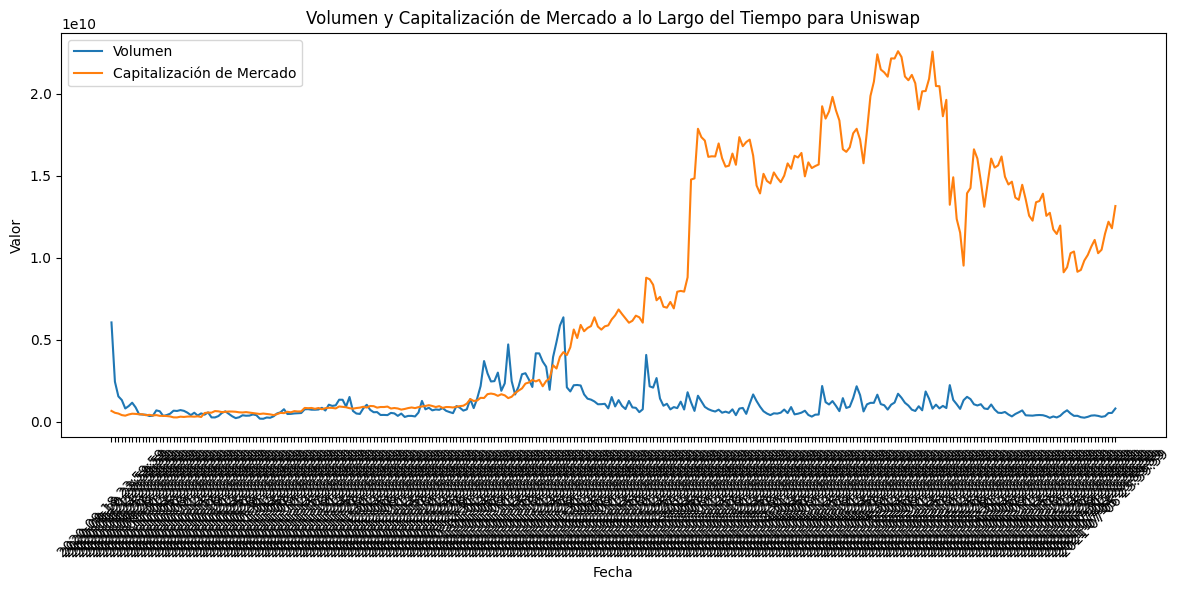


Variables en WrappedBitcoin:
              SNo          High           Low          Open         Close  \
count  888.000000    888.000000    888.000000    888.000000    888.000000   
mean   444.500000  17619.092654  16496.531116  17052.665626  17086.573875   
std    256.487816  16301.939286  15205.998892  15795.486017  15798.492134   
min      1.000000   3464.208166   3330.116349   3400.352374   3395.978616   
25%    222.750000   8194.847021   7774.774023   8031.965401   8031.116676   
50%    444.500000  10168.032909   9573.383527   9797.042177   9801.389279   
75%    666.250000  18719.206476  17713.092170  18266.771656  18335.262163   
max    888.000000  64796.435457  62143.114910  63446.936982  63436.579780   

             Volume     Marketcap  
count  8.880000e+02  8.880000e+02  
mean   5.547932e+07  1.666316e+09  
std    1.032859e+08  2.816566e+09  
min    6.775199e+01  0.000000e+00  
25%    7.333370e+04  4.318467e+06  
50%    2.774677e+05  8.229723e+06  
75%    6.385077e+07  2.2

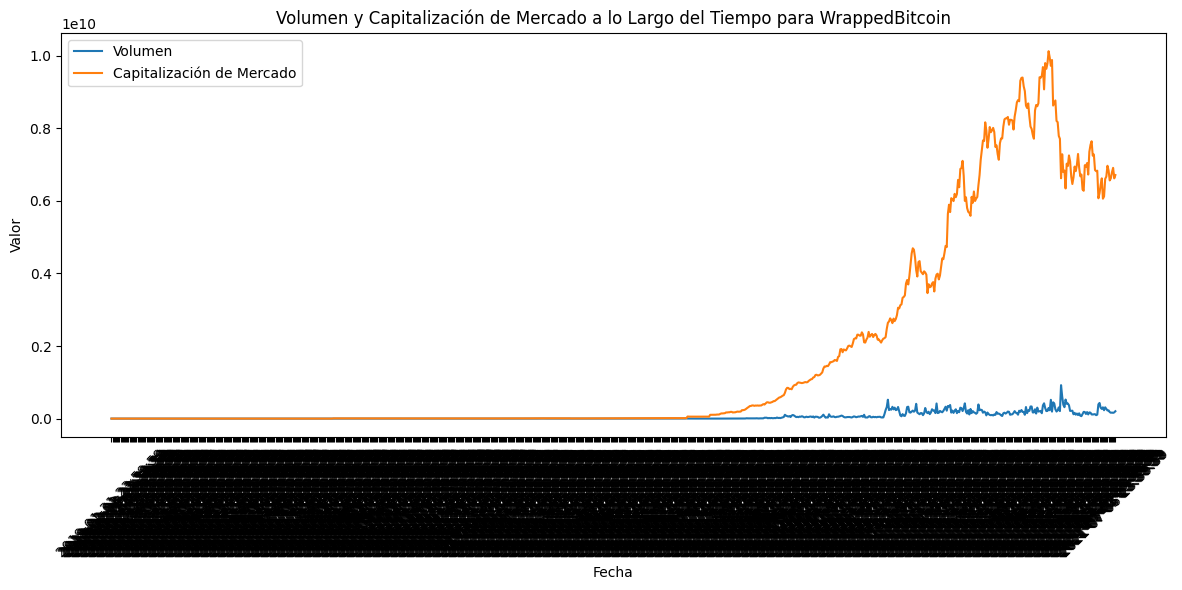


Variables en XRP:
               SNo         High          Low         Open        Close  \
count  2893.000000  2893.000000  2893.000000  2893.000000  2893.000000   
mean   1447.000000     0.246591     0.222000     0.234548     0.234790   
std     835.281489     0.365393     0.311581     0.338544     0.338629   
min       1.000000     0.003082     0.002802     0.002809     0.002810   
25%     724.000000     0.007531     0.007093     0.007332     0.007346   
50%    1447.000000     0.189184     0.176196     0.181968     0.182608   
75%    2170.000000     0.320751     0.303941     0.312021     0.312465   
max    2893.000000     3.841940     3.117340     3.363570     3.377810   

             Volume     Marketcap  
count  2.893000e+03  2.893000e+03  
mean   1.260299e+09  9.678507e+09  
std    3.137958e+09  1.385907e+10  
min    0.000000e+00  2.196991e+07  
25%    4.780950e+05  2.263168e+08  
50%    1.119370e+08  7.523251e+09  
75%    1.238721e+09  1.306444e+10  
max    3.695518e+10  1.308

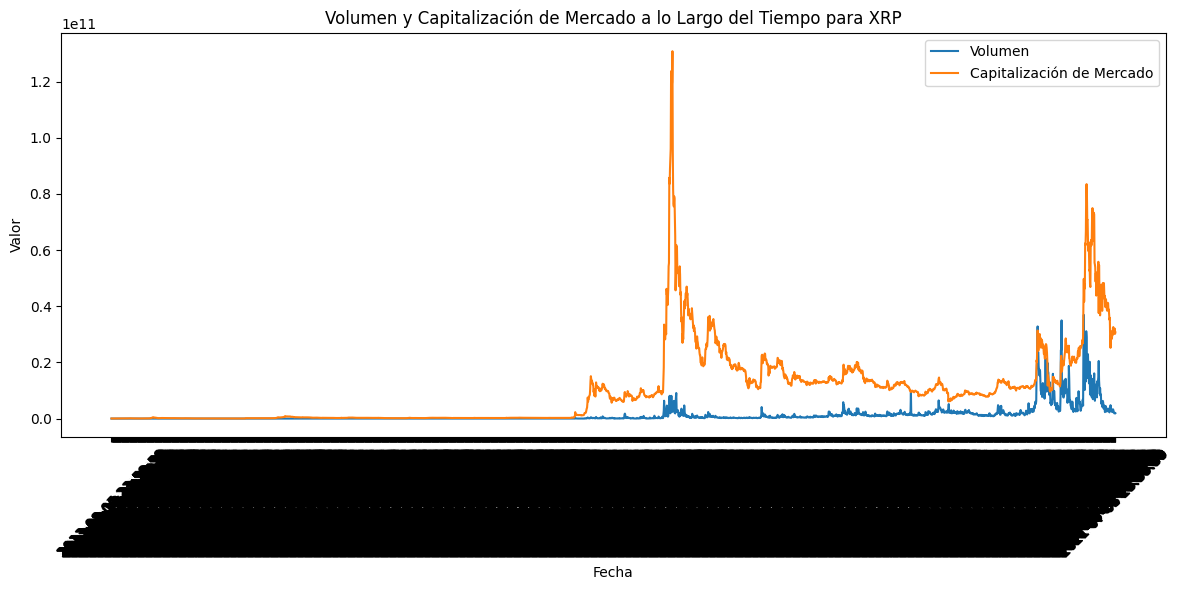

In [ ]:
# 3. Analizar otras variables adicionales
print("\nAnálisis descriptivo de otras variables:")
for coin_name, df in dataframes.items():
    print(f"\nVariables en {coin_name}:")
    print(df.describe())  # Resumen estadístico para cada criptomoneda

    # Visualizar algunas variables adicionales como 'Volume' y 'Marketcap'
    if 'Volume' in df.columns and 'Marketcap' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x='Date', y='Volume', label='Volumen')
        sns.lineplot(data=df, x='Date', y='Marketcap', label='Capitalización de Mercado')
        plt.title(f'Volumen y Capitalización de Mercado a lo Largo del Tiempo para {coin_name}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### **3.4. Relación Entre Variables**
---


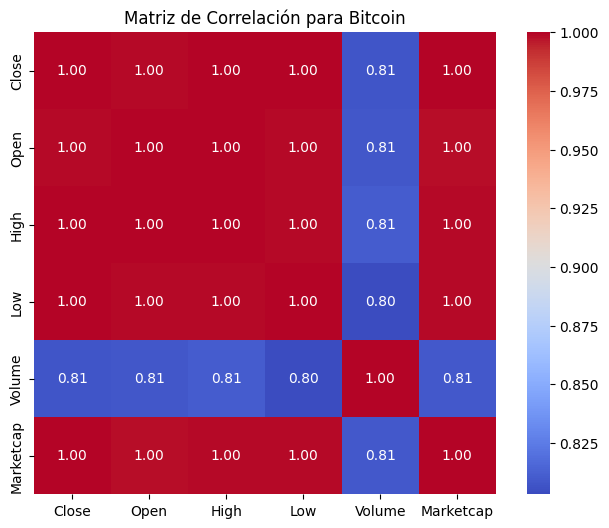

In [ ]:

# Asegurarse de que la columna 'Date' está en formato datetime
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors='coerce')

#Seleccionar solo las columnas relevantes, incluyendo 'Close'
columns_of_interest = ['Close', 'Open', 'High', 'Low', 'Volume', 'Marketcap']
subset_df = bitcoin_data[columns_of_interest].select_dtypes(include=['float64', 'int64'])

#Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# 3 Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación para Bitcoin')
plt.show()

In [ ]:
# 3. Identificar redundancia
threshold = 0.8  # Umbral para considerar alta correlación
redundant_vars = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_vars.append(colname)

redundant_vars = list(set(redundant_vars))  # Eliminar duplicados
print(f"Variables redundantes (correlación > {threshold}): {redundant_vars}")

Variables redundantes (correlación > 0.8): ['Marketcap', 'Volume', 'Open', 'High', 'Low']


Teniendo en cuenta que contamos con series para distintas criptomonedas, trabajaremos unicamente con la serie de Bitcoin, ya que es la criptomoneda por excelencia; la más relevante y seguida del mercado, así como una de las más antiguas, por lo que cuenta con mayor número de observaciones.

In [ ]:
# dado que solo trabajamos con bitcoin, podemos prescindir de las variables "Name", "Symbol", así como de "SNo"

bitcoin_data = bitcoin_data.drop(["Name", "Symbol", "SNo"], axis=1)

In [ ]:
# verificamos los valores nulos

print(bitcoin_data.isnull().sum())

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [ ]:
# generaremos nuevas variables que nos brindarán más información acerca del comportamiento, volatilidad y tendencias de los precios

# 1) dia de la semana, mes y año: estas variables nos pueden ayudar patrones estacionales o tendencias temporales
data = bitcoin_data
data['Date'] = pd.to_datetime(data['Date'])

data['Day_of_Week'] = data['Date'].dt.dayofweek # 0 representa el dia lunes
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# 2) diferencia entre el precio más alto y el más bajo y diferencia entre el precio de cierre y el precio de apertura:
# estas variables nos brindaran información acerca de la volatilidad diaria de los precios.

data['High_Low_Diff'] = data['High'] - data['Low']
data['Close_Open_Diff'] = data['Close'] - data['Open']

# 3) cambio porcentual del precio de cierre: nos ayudará a detectar mejor tendencias de corto plazo

data['Close_Change_Percent'] = data['Close'].pct_change()

# 4) promedios moviles de 5, 10 y 20 dias: con esto capturaremos mejor las tendencias para ventanas de tiempo más amplias

data['5_Day_MA'] = data['Close'].rolling(window=5).mean()
data['10_Day_MA'] = data['Close'].rolling(window=10).mean()
data['20_Day_MA'] = data['Close'].rolling(window=20).mean()

# 5) volatilidad del precio de cierre para ventanas de 5 y 10 dias: podemos controlar por la volatilidad, que tiende a ser bastante alta
# para los precios de criptomonedas

data['5_Day_Volatility'] = data['Close'].rolling(window=5).std()
data['10_Day_Volatility'] = data['Close'].rolling(window=10).std()

In [ ]:
# verificamos si aparecieron valores nulos

print(data.isnull().sum())

Date                     0
High                     0
Low                      0
Open                     0
Close                    0
Volume                   0
Marketcap                0
Day_of_Week              0
Month                    0
Year                     0
High_Low_Diff            0
Close_Open_Diff          0
Close_Change_Percent     1
5_Day_MA                 4
10_Day_MA                9
20_Day_MA               19
5_Day_Volatility         4
10_Day_Volatility        9
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:

data.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Month,Year,High_Low_Diff,Close_Open_Diff,Close_Change_Percent,5_Day_MA,10_Day_MA,20_Day_MA,5_Day_Volatility,10_Day_Volatility
19,2013-05-18 23:59:59,125.250000,122.300003,123.500000,123.498001,0.0,1.379575e+09,5,5,2013,2.949997,-0.001999,0.003926,118.198601,116.9086,116.91760,5.298514,4.030896
20,2013-05-19 23:59:59,124.500000,119.570999,123.210999,121.989998,0.0,1.363205e+09,6,5,2013,4.929001,-1.221001,-0.012211,120.296600,117.8406,115.79010,3.866279,4.019421
21,2013-05-20 23:59:59,123.621002,120.120003,122.500000,122.000000,0.0,1.363710e+09,0,5,2013,3.500999,-0.500000,0.000082,121.852600,118.3206,114.94010,1.848194,4.216211
22,2013-05-21 23:59:59,123.000000,121.209999,122.019997,122.879997,0.0,1.374013e+09,1,5,2013,1.790001,0.860001,0.007213,122.676599,119.0843,115.23460,0.663286,4.287864
23,2013-05-22 23:59:59,124.000999,122.000000,122.889999,123.889000,0.0,1.385779e+09,2,5,2013,2.000999,0.999001,0.008211,122.851399,119.9732,116.16855,0.860584,4.268414


In [ ]:

variables = [ 'Close','High', 'Low', 'Open', 'Volume', 'Marketcap', 'High_Low_Diff', 'Close_Open_Diff', 'Close_Change_Percent',
             '5_Day_MA', '10_Day_MA', '20_Day_MA', '5_Day_Volatility', '10_Day_Volatility']

bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

bitcoin_data = bitcoin_data.sort_values('Date')
# Convertimos a días desde una fecha base (1970-01-01)
bitcoin_data['Date'] = (bitcoin_data['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

## **4. Modelaje**
---

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
bitcoin_data.head(5)

,Date,High,Low,Open,Close,Volume,Marketcap,Day_of_Week,Month,Year,High_Low_Diff,Close_Open_Diff,Close_Change_Percent,5_Day_MA,10_Day_MA,20_Day_MA,5_Day_Volatility,10_Day_Volatility
0,15824,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,0,4,2013,13.488007,10.095993,NaN,NaN,NaN,NaN,NaN,NaN
1,15825,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,1,4,2013,12.879990,-5.000000,-0.038328,NaN,NaN,NaN,NaN,NaN
2,15826,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2,5,2013,32.169998,-22.010002,-0.158345,NaN,NaN,NaN,NaN,NaN
3,15827,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,3,5,2013,33.318100,-11.169998,-0.100692,NaN,NaN,NaN,NaN,NaN
4,15828,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,4,5,2013,29.028000,-8.500000,-0.070906,120.697998,NaN,NaN,20.516103,NaN


In [ ]:

# Definimos las características y la variable objetivo

data =  bitcoin_data[variables]

# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(2393, 1) (598, 1)


In [ ]:
train_data.head(5)

,Close
0,144.539993
1,139.000000
2,116.989998
3,105.209999
4,97.750000


In [ ]:
# Selecting Close Price values
dataset_train = train_data['Close'].values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 1))
print(dataset_train.shape)

(2393, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.00391729]
 [0.00363215]
 [0.00249931]
 [0.001893  ]
 [0.00150904]]


In [ ]:
# Selecting Close Price values
dataset_test = test_data.Close.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.06162691] [0.05703649] [0.0552744] [0.05221837] [0.04564907]


In [ ]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()

[array([0.00391729, 0.00363215, 0.00249931, 0.001893  , 0.00150904,
       0.00226821, 0.00244372, 0.00225792, 0.00221674, 0.00232308,
       0.00227696, 0.00251012, 0.00240939, 0.00239688, 0.00255026,
       0.00221674, 0.00235674, 0.00259041, 0.00280941, 0.00283427,
       0.00275666, 0.00275717, 0.00280246, 0.0028544 , 0.00299908,
       0.00333363, 0.00327084, 0.00334804, 0.0031558 , 0.00311746,
       0.00328731, 0.00310711, 0.00311746, 0.0031329 , 0.0027722 ,
       0.0027686 , 0.00272732, 0.00273916, 0.00255129, 0.00221674,
       0.00205204, 0.00162484, 0.00195167, 0.00208292, 0.00204432,
       0.00183072, 0.00162376, 0.00162423, 0.00159962, 0.00171234])]
[0.0020057163602477776]

[array([0.00391729, 0.00363215, 0.00249931, 0.001893  , 0.00150904,
       0.00226821, 0.00244372, 0.00225792, 0.00221674, 0.00232308,
       0.00227696, 0.00251012, 0.00240939, 0.00239688, 0.00255026,
       0.00221674, 0.00235674, 0.00259041, 0.00280941, 0.00283427,
       0.00275666, 0.00275717, 0.

In [ ]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])

In [ ]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (2343, 50, 1) y_train : (2343, 1)


In [ ]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (548, 50, 1) y_test : (548, 1)


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

In [ ]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6,
								momentum=0.9,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 50s 39ms/step - loss: 0.0189
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - loss: 0.0013
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.0014
Epoch 4/20
 603/1172 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - loss: 0.0011

KeyboardInterrupt: 

In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								decay=1e-7,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


In [ ]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

In [ ]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

In [ ]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Close[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Close, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Close[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Close, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Close[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Close, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [ ]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()

    # Optimización del número de unidades en la primera capa LSTM
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=16),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))

    # Segunda capa LSTM
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=16),
                   return_sequences=False))

    # Capa densa
    model.add(Dense(25))

    # Capa de salida
    model.add(Dense(1))

    # Compilación del modelo
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    max_trials=15,  # Número de combinaciones a probar
    executions_per_trial=2,  # Número de veces que se entrena cada configuración
    directory='my_dir',
    project_name='helloworld'
)

In [ ]:
# Ajustar el tuner a los datos
tuner.search(X_train, y_train, epochs=40, validation_split=0.2)


In [ ]:

# Obtener los mejores hiperparámetros
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros:")
print(best_hyperparameters.values)

In [ ]:
!pip install tensorflow.keras.callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Crear el modelo con los mejores hiperparámetros
model_LSMODEL = tuner.hypermodel.build(best_hyperparameters)

# Entrenar el modelo optimizado
history = model_LSMODEL.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

In [ ]:
# Predicciones con X_test data usando el modelo optimizado
y_LSMODEL = model_LSMODEL.predict(X_test)

# Escalando de vuelta a la escala original usando el scaler previamente definido
y_LSMODEL_O = scaler.inverse_transform(y_LSMODEL)

In [ ]:
# Visualización de las predicciones
min_length = min(len(test_data.Close.values), len(y_LSMODEL_O))

fig, axs = plt.subplots(figsize=(18, 6))
axs.plot(test_data.index[:min_length], test_data.Close.values[:min_length], label="Test Data", color="g")
axs.plot(test_data.index[:min_length], y_LSMODEL_O[:min_length], label="Predicciones LSTM", color="orange")
axs.legend()
axs.title.set_text("Predicción del Modelo LSTM Optimizado")

plt.xlabel("Días")
plt.ylabel("Precio de Apertura")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que y_test es el valor real de los precios de cierre en el conjunto de prueba
# y_RNN, y_LSTM, y_GRU, y_LSMODEL son las predicciones de cada modelo

# Calcular las métricas para el modelo RNN
mse_rnn = mean_squared_error(y_test, y_RNN)
mae_rnn = mean_absolute_error(y_test, y_RNN)
r2_rnn = r2_score(y_test, y_RNN)

# Calcular las métricas para el modelo LSTM
mse_lstm = mean_squared_error(y_test, y_LSTM)
mae_lstm = mean_absolute_error(y_test, y_LSTM)
r2_lstm = r2_score(y_test, y_LSTM)

# Calcular las métricas para el modelo GRU
mse_gru = mean_squared_error(y_test, y_GRU)
mae_gru = mean_absolute_error(y_test, y_GRU)
r2_gru = r2_score(y_test, y_GRU)

# Calcular las métricas para el modelo LSTM optimizado
mse_lsmodel = mean_squared_error(y_test, y_LSMODEL)
mae_lsmodel = mean_absolute_error(y_test, y_LSMODEL)
r2_lsmodel = r2_score(y_test, y_LSMODEL)

# Imprimir los resultados
print("Resultados del Modelo RNN:")
print(f"Error Cuadrático Medio (MSE): {mse_rnn}")
print(f"Error Absoluto Medio (MAE): {mae_rnn}")
print(f"Coeficiente de Determinación (R^2): {r2_rnn}\n")

print("Resultados del Modelo LSTM:")
print(f"Error Cuadrático Medio (MSE): {mse_lstm}")
print(f"Error Absoluto Medio (MAE): {mae_lstm}")
print(f"Coeficiente de Determinación (R^2): {r2_lstm}\n")

print("Resultados del Modelo GRU:")
print(f"Error Cuadrático Medio (MSE): {mse_gru}")
print(f"Error Absoluto Medio (MAE): {mae_gru}")
print(f"Coeficiente de Determinación (R^2): {r2_gru}\n")

print("Resultados del Modelo LSTM Optimizado:")
print(f"Error Cuadrático Medio (MSE): {mse_lsmodel}")
print(f"Error Absoluto Medio (MAE): {mae_lsmodel}")
print(f"Coeficiente de Determinación (R^2): {r2_lsmodel}\n")

En general, todos los modelos muestran un alto rendimiento, con R 2 R 2 superiores a 0.98, lo que indica que son capaces de predecir adecuadamente los valores objetivo. El modelo LSTM es el más efectivo, seguido por el LSTM optimizado y luego por el GRU. El modelo RNN, aunque tiene un buen ajuste, presenta errores ligeramente mayores en comparación con los otros modelos. Recomendaciones Dado el excelente rendimiento del modelo LSTM y su variante optimizada, se recomienda utilizar estos modelos para realizar predicciones en aplicaciones prácticas. Considera realizar una validación cruzada adicional para confirmar la robustez de estos resultados.

El LSTM el mejor en términos de ajuste y precisión predictiva.